In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

In [2]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

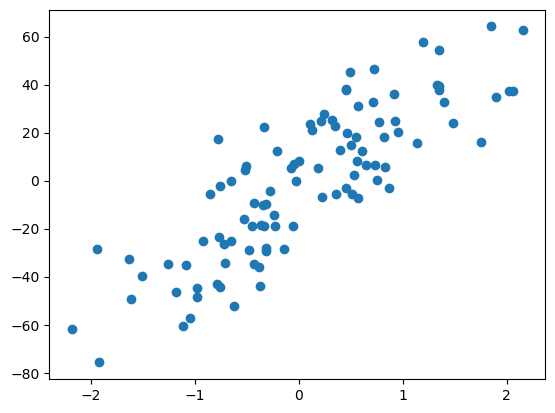

In [4]:
plt.scatter(x,y)

In [5]:
lin = LinearRegression()
lin.fit(x,y)

LinearRegression()

In [6]:
lin.intercept_,lin.coef_

(-2.29474455867698, array([27.82809103]))

In [7]:
ridge = Ridge(alpha=10)
ridge.fit(x,y)
ridge.intercept_,ridge.coef_

(-2.1269130035235726, array([24.9546267]))

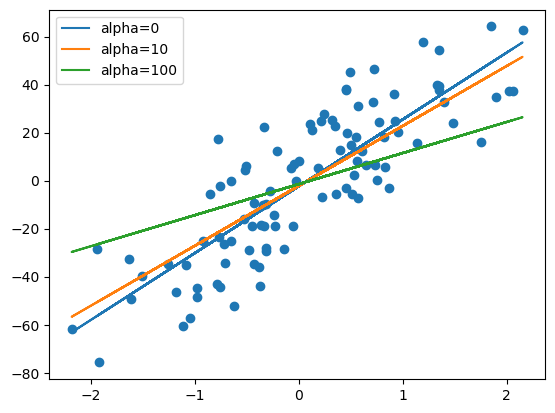

In [9]:
plt.scatter(x,y)
plt.plot(x,Ridge(alpha=0).fit(x,y).predict(x),label='alpha=0')
plt.plot(x,Ridge(alpha=10).fit(x,y).predict(x),label='alpha=10')
plt.plot(x,Ridge(alpha=100).fit(x,y).predict(x),label='alpha=100')
plt.legend()

### creating own class for Ridge Rgression

In [17]:
class MeraRidge:
    def __init__(self,alpha):
        self.alpha = alpha
        self.m = None
        self.b = None
    def fit(self,x,y):
        num,den = 0,0
        for i in range(x.shape[0]):
            num += (x[i]-x.mean())*(y[i]-y.mean())
            den += (x[i]-x.mean())**2

        self.m = num/(den+self.alpha)
        self.b = y.mean()-self.m*x.mean()
    def pridect(self,x):
        return self.m*x+self.b

In [18]:
meraReidge = MeraRidge(alpha=10)
meraReidge.fit(x,y)

In [19]:
meraReidge.b,meraReidge.m

(array([-2.126913]), array([24.9546267]))